>#  HW3. 인구 구조 항아리 막대 그래프 - 2
학번: A70064, 이름: 안종민

목표: 사용자로부터 구(광역시/도 포함) 이름을 입력받아 해당 지역의 연령별 남녀 인구 구조를 항아리 막대그래프로 시각화합니다.

데이터 출처: 행정안전부 주민등록인구통계 CSV (`population_by_gender.csv`)

시각화 도구: `Python`, `Matplotlib`

---
---

### 1. 환경 설정 & 드라이브 마운트

- 라이브러리 임포트, 한글 폰트 설치 및 캐시 갱신, Colab 드라이브 마운트 등을 실행합니다.

In [ ]:
from google.colab import drive
import csv
import os
import matplotlib.pyplot as plt

# 한글 폰트 설치 & 캐시 갱신
# 시스템에 나눔글꼴 설치 (fonts-nanum)
!apt-get install fonts-nanum -qq
# 새로 설치된 폰트를 Matplotlib 등에서 인식하도록 캐시 갱신
!fc-cache -fv
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

### 2. 데이터 로드

- `population_by_gender.csv` 파일을 열고 헤더를 건너뛴 뒤, 리스트로 변환합니다.
- 인코딩 확인: CSV 파일이 `CP949(euc-kr)` 인코딩일 경우 `encoding='cp949'` 지정

In [ ]:
f = open('./gdrive/MyDrive/Colab Notebooks/ch5_population/population_by_gender.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)  # 첫 줄은 헤더이므로 건너뛰기

### 3. 사용자 입력 및 데이터 추출

- 사용자 입력을 받아 해당 지역의 데이터를 검색합니다.
- `rows`는 모든 행을 담은 리스트이며, `for-else` 구조로 `break`되었는지 확인합니다.
- 찾은 `target` 행에서 0~100세 남성과 여성 인구수를 추출하고 숫자형으로 변환합니다.
- 남성 데이터를 음수로 변환하면 그래프 왼쪽으로, 여성은 양수로 오른쪽으로 표시됩니다.

In [ ]:
# 메인 동작
# 사용자로부터 그릴 지역명 입력
region = input("인구 구조를 알고 싶은 지역명(예: 서울특별시)을 입력하세요: ").strip()

# Iterator 'data'에서 한행(row)씩 불러옴
for row in data:
    if region in row[0]:
        target = row
        break
else:
    raise ValueError(f"'{region}' 데이터를 찾을 수 없습니다.")

# 남·여 데이터 전처리
#   - 남성: 인덱스 3~103 → 0~100세, 음수로 변환
male = [-int(x.replace(',', '')) for x in target[3:104]]
#   - 여성(저장1 방식): 뒤에서 -1:-102:-1 → reverse() → 0~100세
female_slice = target[-1:-102:-1]
female_slice.reverse()
female = [int(x.replace(',', '')) for x in female_slice]

ages = list(range(101))  # 0~100세

인구 구조를 알고 싶은 지역명(예: 서울특별시)을 입력하세요: 서울


### 4. 시각화 설정 및 그래프 출력

- 폰트를 `Matplotlib`에 등록하고, 스타일 및 그래프 크기를 설정합니다.
- 수평 막대(`barh`)를 사용해 양쪽으로 뻗는 인구 구조 그래프를 생성합니다.
- `barh(ages, male)`는 male 음수값을 왼쪽으로, `barh(ages, female)` 는 오른쪽으로 그립니다.

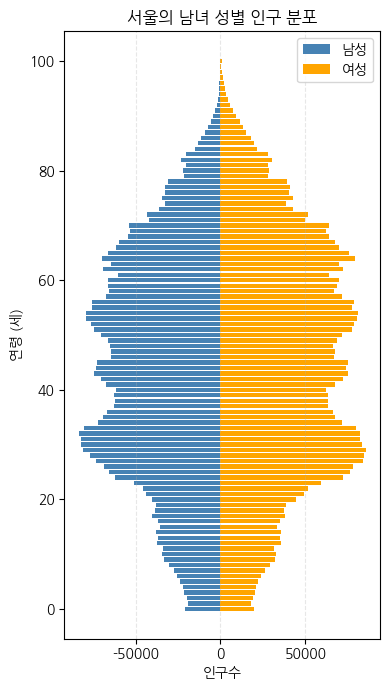

In [ ]:
# 폰트 파일 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# 폰트를 Matplotlib 전역에 추가
fm.fontManager.addfont(font_path)
# 폰트 내부 이름 확인 (optional)
font_prop = fm.FontProperties(fname=font_path)
# rcParams 에서 이 이름을 기본 폰트로 설정
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 항아리형(back-to-back) 그래프 그리기
plt.figure(figsize=(4, 7))
plt.barh(ages, male,   color='steelblue', label='남성')  # 왼쪽 음수
plt.barh(ages, female, color='orange',    label='여성')  # 오른쪽 양수

# 그래프 꾸미기
plt.title(f"{region}의 남녀 성별 인구 분포")
plt.xlabel("인구수")
plt.ylabel("연령 (세)")
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# y축은 0세 아래, 100세 위 순서이므로 기본 상태 유지
plt.tight_layout()
plt.show()